In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def notch_filter(img_size, d0=9, x_k=0, y_k=0):
    ''' shape: tupla de dimensión
        d0: radio - 1
        x_k: localización de espiga en x
        y_k: localización de espiga en y'''
        
    P, Q = img_size
    H = np.zeros((P, Q))                                                        # Inicializa el filtro con una matriz de ceros

    for u in range(0, P):
        for v in range(0, Q):
            D_uv = np.sqrt((u - P / 2 + x_k) ** 2 + (v - Q / 2 + y_k) ** 2)     # Obtiene distancia euclidiana de punto de interes
            D_muv = np.sqrt((u - P / 2 - x_k) ** 2 + (v - Q / 2 - y_k) ** 2)
            if D_uv <= d0 or D_muv <= d0:
                H[u, v] = 0.0
            else:
                H[u, v] = 1.0
    return H

In [2]:
def load_image(path):
    img=cv2.imread(path,0)
    img = img.astype(np.float32)/255
    img_shape = img.shape
    return img, img_shape

In [3]:
img, size = load_image('../figures/lena_.jpeg')

In [4]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)


In [5]:
phase_spectrumR = np.angle(fshift)
magnitude_spectrum = 20*np.log(np.abs(fshift))

In [6]:
H1 = notch_filter(size, 11, 29, -25) 

In [7]:

NotchFilter = H1                                          # Filtro total 
NotchRejectCenter = fshift * NotchFilter                                        # Filtrado de la imagen
NotchReject = np.fft.ifftshift(NotchRejectCenter)                               # Transformada inversa de Fourier
inverse_NotchReject = np.fft.ifft2(NotchReject)     

In [8]:
Result = np.abs(inverse_NotchReject)
M = magnitude_spectrum*NotchFilter


Text(0.5, 1.0, 'Imagen Filtrada')

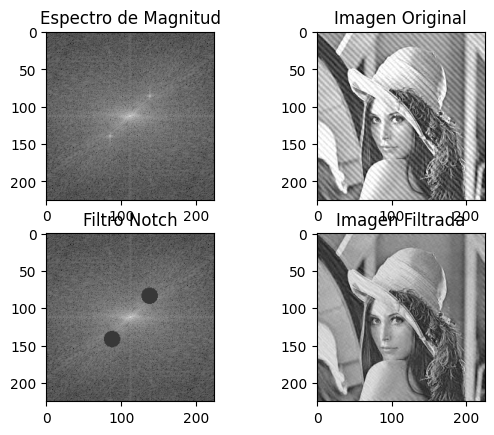

In [9]:
plt.figure()
plt.subplot(222)
plt.imshow(img, cmap='gray')                                                    # Visualización de la imagen
plt.title('Imagen Original')

plt.subplot(221)
plt.imshow(magnitude_spectrum, cmap='gray')                                     # Visualización del espectro frecuencial original
plt.title('Espectro de Magnitud')

plt.subplot(223)
plt.imshow(magnitude_spectrum*NotchFilter, "gray")                              # Visualización del espectro frecuencial original con filtros
plt.title("Filtro Notch")

plt.subplot(224)
plt.imshow(Result, "gray")                                                      # Resultado final
plt.title("Imagen Filtrada")